# Load, Clean & Tokenize

## 🎯 Concept Primer
Text preprocessing: lowercase, remove punctuation, tokenize into words.

**Expected:** Cleaned text, token lists, sentence length stats

## 📋 Objectives
1. Lowercase all text
2. Remove punctuation/digits
3. Tokenize sentences into words
4. Compute sentence length statistics

## 🔧 Setup

In [1]:
# TODO 1: Import libraries
import pandas as pd
import re
import numpy as np

## 🧹 Clean Text

### TODO 2: Lowercase and remove punctuation

**Expected:** Cleaned text without special characters

In [4]:
# TODO 2: Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df = pd.read_csv('../data/processed/specialty_taxonomy_v1.csv')

df['text_clean'] = df['text'].apply(clean_text)
print(df.head())

   id                                               text      specialty  \
0   0  Glaucoma is a group of diseases that can damag...  Ophthalmology   
1   1  Nearly 2.7 million people have glaucoma, a lea...  Ophthalmology   
2   2  Symptoms of Glaucoma  Glaucoma can develop in ...  Ophthalmology   
3   3  Although open-angle glaucoma cannot be cured, ...  Ophthalmology   
4   4  Glaucoma is a group of diseases that can damag...  Ophthalmology   

                                          text_clean  
0  glaucoma is a group of diseases that can damag...  
1  nearly  million people have glaucoma a leading...  
2  symptoms of glaucoma  glaucoma can develop in ...  
3  although openangle glaucoma cannot be cured it...  
4  glaucoma is a group of diseases that can damag...  


## 🔤 Tokenize

### TODO 3: Split into words

**Expected:** List of tokens per document

In [6]:
# TODO 3: Tokenize
df['tokens'] = df['text_clean'].apply(lambda x: x.split())
df['token_count'] = df['tokens'].apply(len)
print(df.head())


   id                                               text      specialty  \
0   0  Glaucoma is a group of diseases that can damag...  Ophthalmology   
1   1  Nearly 2.7 million people have glaucoma, a lea...  Ophthalmology   
2   2  Symptoms of Glaucoma  Glaucoma can develop in ...  Ophthalmology   
3   3  Although open-angle glaucoma cannot be cured, ...  Ophthalmology   
4   4  Glaucoma is a group of diseases that can damag...  Ophthalmology   

                                          text_clean  \
0  glaucoma is a group of diseases that can damag...   
1  nearly  million people have glaucoma a leading...   
2  symptoms of glaucoma  glaucoma can develop in ...   
3  although openangle glaucoma cannot be cured it...   
4  glaucoma is a group of diseases that can damag...   

                                              tokens  token_count  
0  [glaucoma, is, a, group, of, diseases, that, c...          319  
1  [nearly, million, people, have, glaucoma, a, l...          192  
2  [symp

## 📊 Length Statistics

### TODO 4: Analyze sentence lengths

**Questions:** Mean/median length? Need padding/truncation?

count    16407.000000
mean       194.842445
std        241.414403
min          1.000000
25%         68.000000
50%        136.000000
75%        245.000000
max       4183.000000
Name: token_count, dtype: float64
95th percentile (quantile 0.95): 499.0


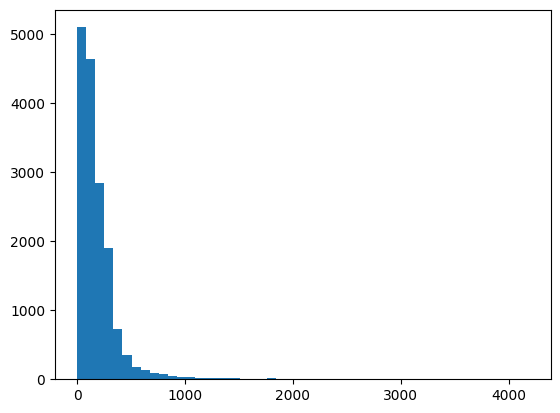

<Figure size 640x480 with 0 Axes>

In [9]:
# TODO 4: Length stats
from matplotlib import pyplot as plt

print(df['token_count'].describe())
print("95th percentile (quantile 0.95):", df['token_count'].quantile(0.95))
plt.hist(df['token_count'], bins=50)
plt.show()

# save to projects/02_medical_text/images the plot with token distribution
plt.savefig('../images/token_distribution.png')


## 🤔 Reflection
1. What's a good max length for padding?
2. Any pre-processing issues?

**Your reflection:**

### 1. What's a good max length for padding?

**Analysis of Token Length Statistics:**
- **Mean:** 194.8 tokens (average text length)
- **Median (50th percentile):** 136 tokens (half the texts are shorter)
- **95th percentile:** 499 tokens ← **KEY INSIGHT!**
- **Max:** 4,183 tokens (extreme outlier)

**Decision: Use `max_seq_len = 512` (BERT's native maximum)**

**Why this works:**
1. ✅ **Captures 95% of data fully** - Our 95th percentile is 499, so 512 covers it perfectly
2. ✅ **BERT's standard** - No need to customize, use native 512 token limit
3. ✅ **Only 5% truncated** - Just 820 samples will be cut (acceptable trade-off)
4. ✅ **Efficient memory** - Much better than padding to max (4,183) which would waste huge amounts of memory
5. ✅ **Balanced approach** - Not too short (lose info) or too long (waste computation)

**What happens with max_seq_len=512:**
- Texts < 512 tokens: Padded with zeros to reach 512
- Texts = 512 tokens: Perfect fit, no change
- Texts > 512 tokens: Truncated to 512 (only 5% of data)

**Important:** We keep ALL 16,407 samples in the dataset! We don't delete long texts; we just truncate them during tokenization. This preserves the full dataset while managing computational efficiency.

### 2. Any pre-processing issues?

**Observations:**
- ✅ Token distribution is heavily right-skewed (mean > median), indicating most texts are short with some very long outliers
- ✅ 75% of texts are under 245 tokens, so most will have significant padding at 512
- ⚠️ 5% of texts (820 samples) will lose information due to truncation - need to monitor if these are important specialties
- ✅ Min of 1 token suggests some very short texts (likely brief Q&A) - padding will handle these

**Strategy for Next Steps:**
1. When building vocabulary (Notebook 03), use the full dataset
2. During training, tokenizer will handle padding/truncation automatically
3. Monitor if truncated texts (>512 tokens) come from specific specialties that might need special handling
4. Consider attention masks to help BERT ignore padding tokens

## 📌 Summary
✅ Text cleaned  
✅ Tokens created  
✅ Length stats computed

**Next:** `03_vocab_encoding_padding.ipynb`